In [17]:
import numpy as np
import pandas as pd
import keras
from keras.preprocessing.sequence import pad_sequences
import random
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("hybridclean.csv")

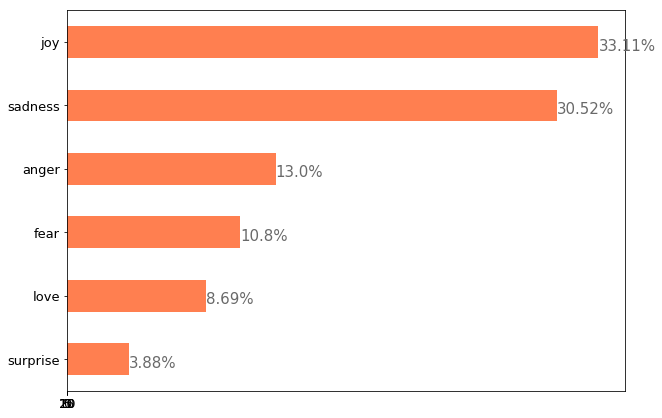

In [26]:
z = df.emotions.value_counts()
ax = z.plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13)
ax.set_alpha(0.8)

ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [6]:
df.rename(columns={'headline':'text'},inplace=True)

In [15]:
def stem_text(word_list):  #Lemmatize text
    new_list = []
    for word in word_list:
        wl = PorterStemmer()
        rootword=wl.stem(word)
        new_list.append(rootword)
    return new_list


def remove_stopwords(row):     #Remove Stopwords from text
    tokens = word_tokenize(row)
    filtered_word = [word for word in tokens if not word in stop_words]
    stemmed_text = stem_text(filtered_word)
    return stemmed_text


def make_string(row):      #Convert list into string
    new = ''
    for word in row:
        new = new + word
        new = new + ' '
    return new


def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    return text

df['statement_clean'] = ''
df['statement_clean'] = df['text'].apply(lambda x: x.lower())
df['statement_clean'] = df['statement_clean'].map(lambda x:clean_text(x))
stop_words = set(stopwords.words('english'))
df['statement_clean'] = df['statement_clean'].apply(remove_stopwords)
df['statement_clean'] = df['statement_clean'].apply(make_string)
df['statement_clean'].replace(to_replace = '[^\w\s]',value='',inplace = True,regex = True )  #Remove punctuation
df['statement_clean'].replace(to_replace = '[\d]',value='',inplace = True,regex = True )     #Remove digits
df['statement_clean'] = df['statement_clean'].apply(lambda x:" ".join(x.split()))            #Remove duplicate white spaces
df['statement_clean'] = df['statement_clean'].apply(lambda x:" ".join(word for word in x.split(' ') if len(word) > 3))   #Remove single letter words
print(df['statement_clean'])

0                                      smell hillari fear
1       watch exact moment paul ryan commit polit suic...
2                              kerri pari gestur sympathi
3                  berni support twitter erupt anger warn
4                               battl york primari matter
5                                                  tehran
6               girl horrifi watch boyfriend left facetim
7                                       britain schindler
8            fact check trump clinton command chief forum
9       iran reportedli make push uranium concess nucl...
10      three clinton iowa glimps fire elud hillari cl...
11      donald trump shockingli weak deleg game someho...
12          strong solar storm tech risk today news video
13                                   america prepar world
14                                trump take cruz lightli
15                                      women lead differ
16      shock michel obama hillari caught glamor date ...
17      hillar

In [26]:
len(df)

6247

In [27]:
len(ff)

441781

In [48]:
df=ff

In [27]:
df.dropna(subset=['statement_clean'],inplace=True)

In [28]:
input_sentences = [text.split(" ") for text in df["statement_clean"].values.tolist()]
labels = df["emotions"].values.tolist()
labels

['sadness',
 'sadness',
 'joy',
 'sadness',
 'love',
 'love',
 'joy',
 'joy',
 'joy',
 'anger',
 'anger',
 'sadness',
 'joy',
 'anger',
 'anger',
 'joy',
 'sadness',
 'fear',
 'joy',
 'love',
 'sadness',
 'sadness',
 'fear',
 'sadness',
 'love',
 'anger',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'surprise',
 'fear',
 'joy',
 'joy',
 'love',
 'sadness',
 'joy',
 'fear',
 'joy',
 'fear',
 'sadness',
 'joy',
 'sadness',
 'surprise',
 'joy',
 'fear',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'sadness',
 'anger',
 'joy',
 'love',
 'love',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'surprise',
 'sadness',
 'surprise',
 'sadness',
 'joy',
 'surprise',
 'sadness',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'love',
 'joy',
 'fear',
 'joy',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'fear',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'joy',
 '

In [29]:
word2id = dict()
label2id = dict()

max_words = 0 # maximum number of words in a sentence

# Construction of word2id dict
for sentence in input_sentences:
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
    if len(sentence) > max_words:
        max_words = len(sentence)
    
# Construction of label2id and id2label dicts
label2id = {l: i for i, l in enumerate(set(labels))}
id2label = {v: k for k, v in label2id.items()}
id2label

{0: 'fear', 1: 'anger', 2: 'sadness', 3: 'joy', 4: 'surprise', 5: 'love'}

In [30]:
# Encode input words and labels
X = [[word2id[word] for word in sentence] for sentence in input_sentences]
Y = [label2id[label] for label in labels]

# Apply Padding to X
X = pad_sequences(X, max_words)

# Convert Y to numpy array
Y = keras.utils.to_categorical(Y, num_classes=len(label2id), dtype='float32')

# Print shapes
print("Shape of X: {}".format(X.shape))
print("Shape of Y: {}".format(Y.shape))

Shape of X: (441671, 57)
Shape of Y: (441671, 6)


In [32]:
print(X)
print(Y)

[[    0     0     0 ...     1     2     3]
 [    0     0     0 ...     0     4     0]
 [    0     0     0 ...    13    14    15]
 ...
 [    0     0     0 ...    40  6767    62]
 [    0     0     0 ...  4426 63306  2064]
 [    0     0     0 ... 13822 22435  9864]]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [29]:
print(max_words)

24


In [47]:
id2label

{0: '',
 1: 'fear',
 2: 'surprise',
 3: 'anger',
 4: 'happiness',
 5: 'sadness',
 6: 'love',
 7: 'joy'}

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test =  train_test_split(X, Y,test_size =0.20,random_state= 4 )

In [33]:
embedding_dim = 100 # The dimension of word embeddings

# Define input tensor
sequence_input = keras.Input(shape=(max_words,), dtype='int32')

# Word embedding layer
embedded_inputs =keras.layers.Embedding(len(word2id) + 1,
                                        embedding_dim,
                                        input_length=max_words)(sequence_input)

# Apply dropout to prevent overfitting
embedded_inputs = keras.layers.Dropout(0.2)(embedded_inputs)

# Apply Bidirectional LSTM over embedded inputs
lstm_outs = keras.layers.wrappers.Bidirectional(
    keras.layers.CuDNNLSTM(embedding_dim, return_sequences=True)
)(embedded_inputs)

# Apply dropout to LSTM outputs to prevent overfitting
lstm_outs = keras.layers.Dropout(0.2)(lstm_outs)

# Attention Mechanism - Generate attention vectors
input_dim = int(lstm_outs.shape[2])
permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
attention_vector = keras.layers.Reshape((max_words,))(attention_vector)
attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])

# Last layer: fully connected with softmax activation
fc = keras.layers.Dense(embedding_dim, activation='relu')(attention_output)
output = keras.layers.Dense(len(label2id), activation='softmax')(fc)

# Finally building model
model = keras.Model(inputs=[sequence_input], outputs=output)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [35]:
print(sequence_input)
print(embedded_inputs)
print(lstm_outs)

Tensor("input_1:0", shape=(?, 57), dtype=int32)
Tensor("dropout_1/cond/Merge:0", shape=(?, 57, 100), dtype=float32)
Tensor("dropout_2/cond/Merge:0", shape=(?, 57, 200), dtype=float32)


In [55]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 57)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 57, 100)      6330900     input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 57, 100)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 57, 200)      161600      dropout_1[0][0]                  
__________________________________________________________________________________________________
dropout_2 

In [14]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [15]:
model.fit(X, Y, epochs=4, batch_size=64, validation_split=0.1, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 397503 samples, validate on 44168 samples
Epoch 1/4
397503/397503 [==============================] - 317s 797us/step - loss: 0.3204 - acc: 0.8685 - val_loss: 2.7996 - val_acc: 0.5509
Epoch 2/4
397503/397503 [==============================] - 310s 781us/step - loss: 0.2111 - acc: 0.9039 - val_loss: 3.3244 - val_acc: 0.5451
Epoch 3/4
397503/397503 [==============================] - 309s 779us/step - loss: 0.1934 - acc: 0.9092 - val_loss: 3.2606 - val_acc: 0.5792
Epoch 4/4
397503/397503 [==============================] - 310s 781us/step - loss: 0.1807 - acc: 0.9129 - val_loss: 3.4112 - val_acc: 0.5345


In [73]:
ff = pd.read_csv("../../dataset.csv")

In [77]:
print(len(ff))
ff.columns

20203


Index(['id', 'headline', 'author', 'news', 'label', 'statement_clean'], dtype='object')

In [78]:
def stem_text(word_list):  #Lemmatize text
    new_list = []
    for word in word_list:
        wl = PorterStemmer()
        rootword=wl.stem(word)
        new_list.append(rootword)
    return new_list


def remove_stopwords(row):     #Remove Stopwords from text
    tokens = word_tokenize(row)
    filtered_word = [word for word in tokens if not word in stop_words]
    stemmed_text = stem_text(filtered_word)
    return stemmed_text


def make_string(row):      #Convert list into string
    new = ''
    for word in row:
        new = new + word
        new = new + ' '
    return new


def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    return text

ff['statement_clean'] = ''
ff['statement_clean'] = ff['headline'].apply(lambda x: x.lower())
ff['statement_clean'] = ff['statement_clean'].map(lambda x:clean_text(x))
stop_words = set(stopwords.words('english'))
ff['statement_clean'] = ff['statement_clean'].apply(remove_stopwords)
ff['statement_clean'] = ff['statement_clean'].apply(make_string)
ff['statement_clean'].replace(to_replace = '[^\w\s]',value='',inplace = True,regex = True )  #Remove punctuation
ff['statement_clean'].replace(to_replace = '[\d]',value='',inplace = True,regex = True )     #Remove digits
ff['statement_clean'] = ff['statement_clean'].apply(lambda x:" ".join(x.split()))            #Remove duplicate white spaces
ff['statement_clean'] = ff['statement_clean'].apply(lambda x:" ".join(word for word in x.split(' ') if len(word) > 3))   #Remove single letter words
print(ff['statement_clean'])

0              hous even comey letter jason chaffetz tweet
1              flynn hillari clinton woman campu breitbart
2                                         truth might fire
3                    civilian kill singl airstrik identifi
4        iranian woman jail fiction unpublish stori wom...
5        jacki mason hollywood would love trump bomb no...
6        life life luxuri elton john favorit shark pict...
7        beno hamon french socialist parti presidenti n...
8        excerpt draft script donald trump ampa black c...
9        back channel plan ukrain russia courtesi trump...
10       obama organ action partner soro link indivis d...
11                   comedi sketch real housew caus outrag
12       russian research discov secret nazi militari b...
13                                offici link trump russia
14        paid govern troll social media blog forum websit
15       major leagu soccer argentin find home success ...
16                well fargo chief abruptli step york ti

In [79]:
input_sentences = [text.split(" ") for text in ff["statement_clean"].values.tolist()]



# Construction of word2id dict
for sentence in input_sentences:
    for word in sentence:
        # Add words to word2id dict if not exist
        if word not in word2id:
            word2id[word] = len(word2id)
    # If length of the sentence is greater than max_words, update max_words
  
        
X_test = [[word2id[word] for word in sentence] for sentence in input_sentences]


# Apply Padding to X
X_test = pad_sequences(X_test, max_words)


In [80]:
print(max_words)

57


In [81]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
preds = model.predict(X_test)

In [82]:
preds = np.argmax(preds, axis=1)
preds

array([2, 3, 6, ..., 6, 3, 6])

In [83]:
preds = np.argmax(preds, axis=1)
y_val_actual = np.argmax(Y_test, axis=1)
print(accuracy_score(y_val_actual, preds))
print ("Classification report: ")
print(classification_report(y_val_actual, preds))
conf_mat = confusion_matrix(y_val_actual, preds)

AxisError: axis 1 is out of bounds for array of dimension 1

In [72]:
model.save("emotionmodel.h5")
print("Model saved to disk")

Model saved to disk


In [35]:
print(preds)

[5 3 1 ... 5 0 5]


In [84]:
len(ff)

20203

In [85]:
len(preds)

20203

In [86]:
final_preds = [id2label[pred] for pred in preds ]

In [97]:
ff.reset_index(inplace=True)

In [98]:
ff['emotion_new'] = pd.Series(final_preds)

In [99]:
ff

index     id                                           headline  \
0          0      0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1      1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2      2                  Why the Truth Might Get You Fired   
3          3      3  15 Civilians Killed In Single US Airstrike Hav...   
4          4      4  Iranian woman jailed for fictional unpublished...   
5          5      5  Jackie Mason: Hollywood Would Love Trump if He...   
6          6      6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7          7      7  Benoît Hamon Wins French Socialist Party’s Pre...   
8          8      8  Excerpts From a Draft Script for Donald Trump’...   
9          9      9  A Back-Channel Plan for Ukraine and Russia, Co...   
10        10     10  Obama’s Organizing for Action Partners with So...   
11        11     11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...   
12        12     12  Russian Researchers Discover Secret Nazi Milit...   
13        13     13  US Officials See No Link Between Trump and Russia   
14        14     14  Re: Yes, There Are Paid Government Trolls On S...   
15        15     15  In Major League Soccer, Argentines Find a Home...   
16        16     16  Wells Fargo Chief Abruptly Steps Down - The Ne...   
17        17     17  Anonymous Donor Pays $2.5 Million To Release E...   
18        18     18                          FBI Closes In On Hillary!   
19        19     19  Chuck Todd: ’BuzzFeed Did Donald Trump a Polit...   
20        20     20  News: Hope For The GOP: A Nude Paul Ryan Has J...   
21        21     21  Monica Lewinsky, Clinton Sex Scandal Set for ’...   
22        22     22  Rob Reiner: Trump Is ’Mentally Unstable’ - Bre...   
23        23     23  Massachusetts Cop’s Wife Busted for Pinning Fa...   
24        24     24  Abortion Pill Orders Rise in 7 Latin American ...   
25        25     25  Nukes and the UN: a Historic Treaty to Ban Nuc...   
26        26     26  EXCLUSIVE: Islamic State Supporters Vow to ‘Sh...   
27        27     27  Humiliated Hillary Tries To Hide What Camera C...   
28        28     28  Andrea Tantaros of Fox News Claims Retaliation...   
29        29     29  How Hillary Clinton Became a Hawk - The New Yo...   
...      ...    ...                                                ...   
20173  20768  20768  Osama bin Laden’s older brother rents out luxu...   
20174  20769  20769       WORLD WAR 3 ▲ Mr.President #004 ▲ xFrozenLPx   
20175  20770  20770  HUMA ABEDIN SWORE UNDER OATH SHE GAVE UP ‘ALL ...   
20176  20773  20773  Australia to hunt down anti-vax nurses and pro...   
20177  20774  20774  Government Report: Islamists Building ’Paralle...   
20178  20775  20775  How this WWII airman is helping veterans heal ...   
20179  20776  20776  Trump Campaign Says Hillary Supporter Tried As...   
20180  20777  20777  Editor of Austria’s Largest Paper Charged with...   
20181  20778  20778  This Is a Jobs Report That Democrats Can Boast...   
20182  20779  20779  Christians in 2017 ’Most Persecuted Group in t...   
20183  20780  20780  Florida Woman Charged in Death of Infant in ‘C...   
20184  20781  20781  Time is Running Out to Stop Kratom Ban – Need ...   
20185  20782  20782  The Fix Is In: NBC Affiliate Accidentally Post...   
20186  20783  20783  Samsung, Kim Jong-un, Rex Tillerson: Your Morn...   
20187  20784  20784  Comment on World Heaves Sigh of Relief after T...   
20188  20785  20785  Ann Coulter: How to Provide Universal Health C...   
20189  20786  20786  Government Forces Advancing at Damascus-Aleppo...   
20190  20787  20787  Sally Yates Won’t Say If Trump Was Wiretapped ...   
20191  20788  20788  Maine’s Gov. LePage Threatens To ‘Investigate’...   
20192  20789  20789  Sen. McConnell: The Supreme Court Vacancy Was ...   
20193  20790  20790  Nikki Haley Blasts U.N. Human Rights Office fo...   
20194  20791  20791  Lawyer Who Kept Hillary Campaign Chief Out of ...   
20195  2079

In [100]:
ff.to_csv("finaldataset3rd-1.csv",index=False)